<img src="https://github.com/digslima/ebac-image/blob/main/ebac_logo-data_science.png?raw=true" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Projeto #02** | Previsão de renda

---

# <div style="text-align:center"> Projeto 02 - Previsão de renda </div>

## Índice <a name="Contents"></a>

- [Etapa 1 CRISP - DM: Entendimento do negócio](#1)
- [Etapa 2 Crisp-DM: Entendimento dos dados](#2)
    > - [Dicionário de dados](#dicionario)
    > - [Carregando os pacotes](#pacotes)
    > - [Carregando os dados](#dados)
    > - [Entendimento dos dados - Univariada](#univariada)
    >> - [Pandas Profiling – Relatório interativo para análise exploratória de dados](#Análise Exploratória de Dados)
    >> - [Estatísticas descritivas das variáveis quantitativas](#describe)
    > - [Entendimento dos dados - Bivariadas](#bivariada)
    >> - [Matriz de correlação](#correlacao)
    >> - [Matriz de dispersão](#dispersao)
    >>> - [Clustermap](#clustermap)
    >>> - [Linha de tendência](#tendencia)
    >> - [Análise das variáveis qualitativas](#qualitativas)
    >>> - [Análise de relevância preditiva com variáveis booleanas](#booleanas)
    >>> - [Análise das variáveis qualitativas ao longo do tempo](#tempo)
- [Etapa 3 Crisp-DM: Preparação dos dados](#3)
    > - [Conversão das variáveis categóricas em variáveis numéricas (dummies)](#dummies)
- [Etapa 4 Crisp-DM: Modelagem](#4)
    > - [Divisão da base em treino e teste](#train_test)
    > - [Seleção de hiperparâmetros do modelo com for loop](#for_loop)
    > - [Rodando o modelo](#rodando)
    >> - [Visualização gráfica da árvore com plot_tree](#plot_tree)
    >> - [Visualização impressa da árvore](#tree_print)
- [Etapa 5 Crisp-DM: Avaliação dos resultados](#5)
- [Etapa 6 Crisp-DM: Implantação](#6)
    > - [Simulando a previsão de renda](#simulacao)

---

# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio <a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Uma instituição financeira deseja compreender melhor o perfil de renda de seus novos clientes para diversos propósitos, como definir de forma mais precisa o limite de crédito dos cartões, sem precisar solicitar holerites ou documentos que possam afetar a experiência do cliente.

Para alcançar esse objetivo, a instituição realizou um estudo com alguns clientes, verificando suas rendas por meio de holerites e outros documentos. Com base nisso, pretende desenvolver um modelo preditivo para estimar a renda dos clientes utilizando algumas variáveis já disponíveis em seu banco de dados.

## Etapa 2 Crisp-DM: Entendimento dos dados<a name="2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dicionário de dados <a name="dicionario"></a>

| Variável              | Descrição                                                                                                  | Tipo             |
| --------------------- |:----------------------------------------------------------------------------------------------------------:| ----------------:|
| data_ref              | Data de referência de coleta das variáveis                                                                 | object           |
| id_cliente            | Código identificador exclusivo do cliente                                                                  | int              |
| sexo                  | Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                                          | object (binária) |
| posse_de_veiculo      | Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                 | bool (binária)   |
| posse_de_imovel       | Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                    | bool (binária)   |
| qtd_filhos            | Quantidade de filhos do cliente                                                                            | int              |
| tipo_renda            | Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                | object           |
| educacao              | Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação) | object           |
| estado_civil          | Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                         | object           |
| tipo_residencia       | Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)            | object           |
| idade                 | Idade do cliente em anos                                                                                   | int              |
| tempo_emprego         | Tempo no emprego atual                                                                                     | float            |
| qt_pessoas_residencia | Quantidade de pessoas que moram na residência                                                              | float            |
| **renda**             | Valor numérico decimal representando a renda do cliente em reais                                           | float            |

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Carregando os pacotes <a name="pacotes"></a>
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

### Carregando os dados <a name="dados"></a>
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
filepath = 'previsao_de_renda.csv'
renda = pd.read_csv(filepath_or_buffer=filepath)

renda.info()
renda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [3]:
renda.nunique()

Unnamed: 0               15000
data_ref                    15
id_cliente                9845
sexo                         2
posse_de_veiculo             2
posse_de_imovel              2
qtd_filhos                   8
tipo_renda                   5
educacao                     5
estado_civil                 5
tipo_residencia              6
idade                       47
tempo_emprego             2589
qt_pessoas_residencia        9
renda                     9786
dtype: int64

In [4]:
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')

print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')

print('Quantidade após remoção das linhas duplicadas:', 
      len(renda.drop_duplicates()), '\n')

renda.drop_duplicates(inplace=True, ignore_index=True)
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14593

### Entendimento dos dados - Univariada <a name="univariada"></a>
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### Análise Exploratória de Dados <a name="Análise Exploratória de Dados"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
print("Estatísticas Descritivas:")
print(renda.describe())

os.makedirs('./output', exist_ok=True)

renda.describe().to_csv('./output/renda_descriptive_statistics.csv')

for column in renda.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(renda[column], bins=30, kde=True)
    plt.title(f"Distribuição de {column}")
    plt.savefig(f'./output/histograma_{column}.png')
    plt.close()

for column in renda.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    renda[column].value_counts().plot(kind='bar')
    plt.title(f"Contagem de {column}")
    plt.savefig(f'./output/barra_{column}.png')
    plt.close()

num_cols = renda.select_dtypes(include='number').columns
sns.pairplot(renda[num_cols])
plt.savefig('./output/pairplot.png')
plt.close()

numeric_data = renda.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.savefig('./output/heatmap_correlacao.png')
plt.close()

Estatísticas Descritivas:
         qtd_filhos         idade  tempo_emprego  qt_pessoas_residencia  \
count  14593.000000  14593.000000   12090.000000           14593.000000   
mean       0.433290     43.868910       7.724567               2.207086   
std        0.746029     11.276626       6.718007               0.909117   
min        0.000000     22.000000       0.117808               1.000000   
25%        0.000000     34.000000       3.006164               2.000000   
50%        0.000000     43.000000       6.013699               2.000000   
75%        1.000000     53.000000      10.123288               3.000000   
max       14.000000     68.000000      42.906849              15.000000   

               renda  
count   14593.000000  
mean     5698.140557  
std      8314.021152  
min       118.710000  
25%      2018.880000  
50%      3488.410000  
75%      6379.570000  
max    245141.670000  


####  Estatísticas descritivas das variáveis quantitativas <a name="describe"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,14593.0,0.433290,0.746029,0.000000,0.000000,0.000000,1.000000,14.000000
idade,14593.0,43.868910,11.276626,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12090.0,7.724567,6.718007,0.117808,3.006164,6.013699,10.123288,42.906849
qt_pessoas_residencia,14593.0,2.207086,0.909117,1.000000,2.000000,2.000000,3.000000,15.000000
renda,14593.0,5698.140557,8314.021152,118.710000,2018.880000,3488.410000,6379.570000,245141.670000


### Entendimento dos dados - Bivariadas <a name="bivariada"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### Matriz de correlação <a name="correlacao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [8]:
numeric_data = renda.iloc[:, 3:].select_dtypes(include='number')

correlation_tail = numeric_data.corr().tail(n=1)

print(correlation_tail)

       qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia  renda
renda    0.030296  0.023445       0.385014               0.048616    1.0


A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com a varíavel `renda` é `tempo_emprego`, com um índice de correlação de 38,5%.

#### Matriz de dispersão <a name="dispersao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

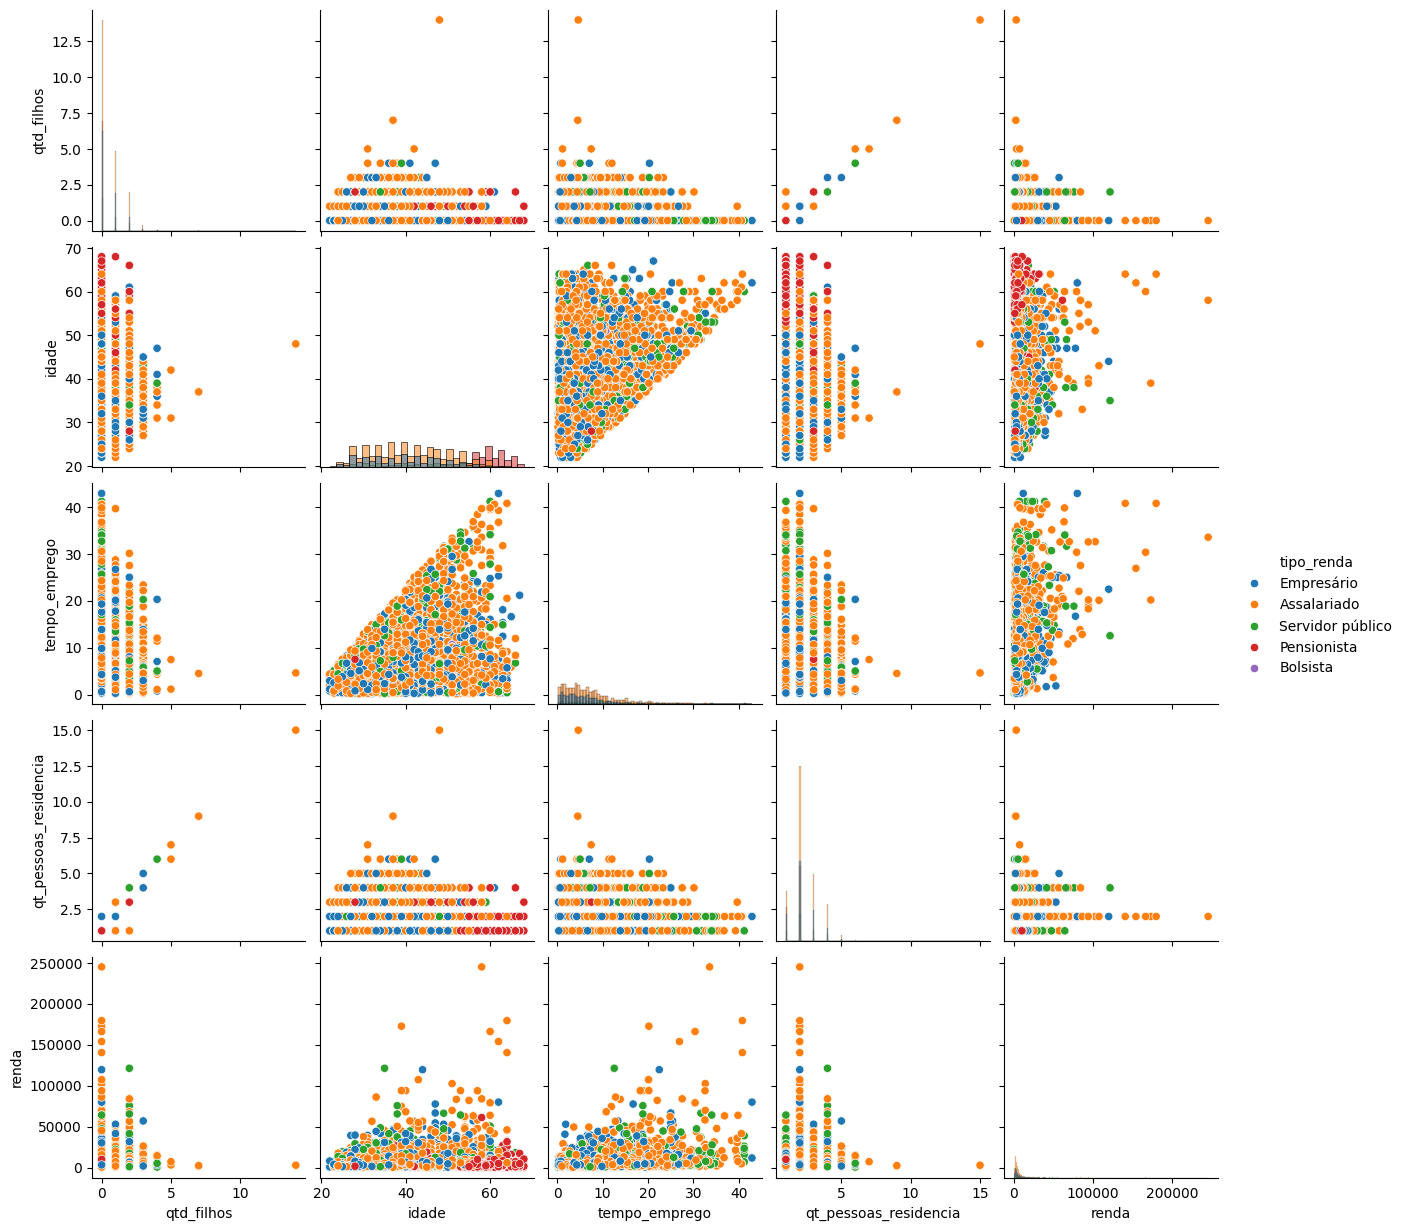

In [9]:
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

Ao examinar o **pairplot**, que é uma matriz de dispersão, é possível identificar alguns *outliers* na variável de renda. Esses *outliers*, embora ocorram com pouca frequência, podem influenciar os resultados da análise de tendência. Além disso, observa-se uma baixa correlação entre quase todas as variáveis quantitativas, o que confirma os resultados obtidos na matriz de correlação.

#### Clustermap <a name="clustermap"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [11]:
numeric_renda = renda.select_dtypes(include=[float, int])
corr_matrix = numeric_renda.corr()

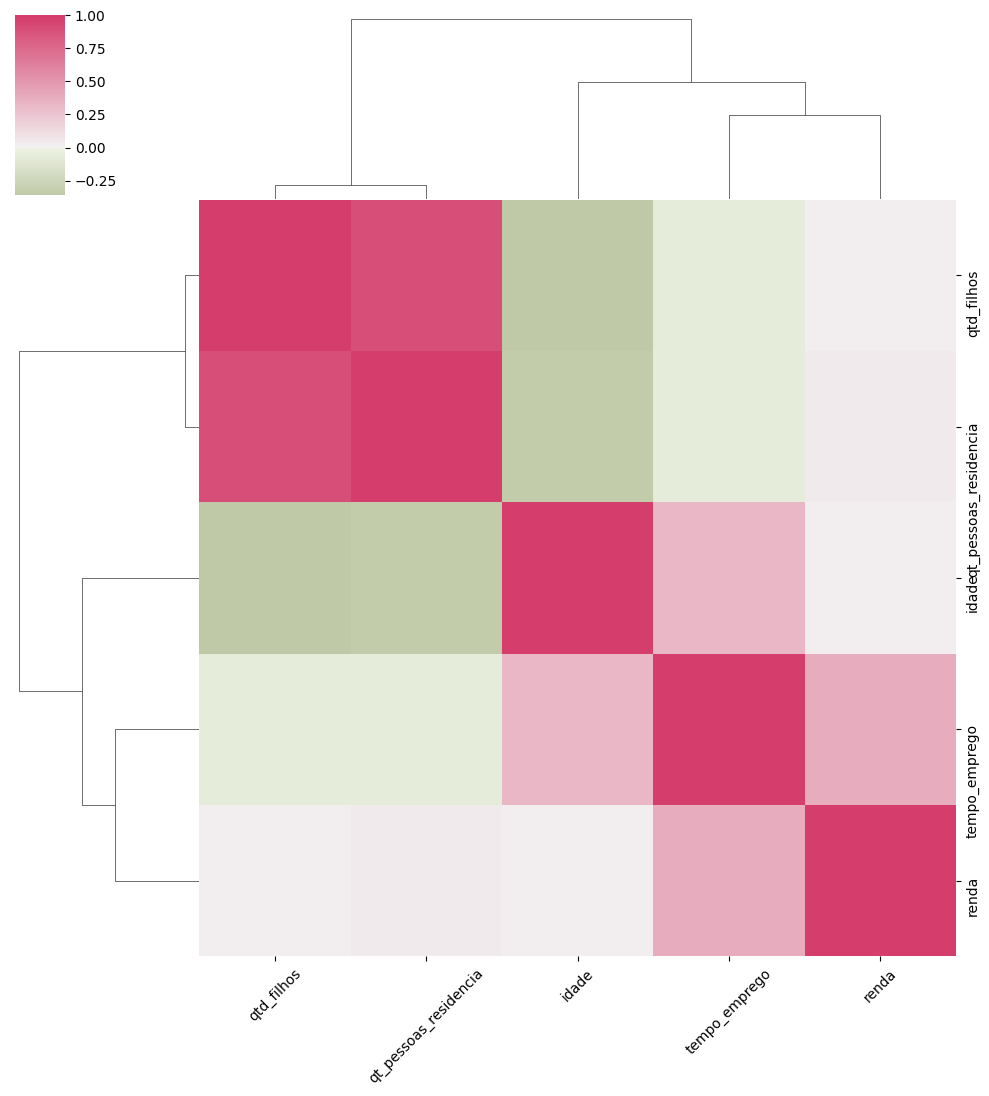

In [12]:
cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center='light')

ax = sns.clustermap(data=corr_matrix, 
                    figsize=(10, 10), 
                    center=0, 
                    cmap=cmap)

plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)
plt.show()

Usando o *clustermap*, podemos confirmar que a maioria das variáveis apresenta baixa correlação com a renda. A única exceção notável é a variável `tempo_emprego`, que demonstra um índice de correlação significativo. Além disso, as variáveis booleanas`posse_de_imove` e `posse_de_veicul` também foram analisadas, mas exibem uma correlação reduzida com a renda.

####  Linha de tendência <a name="tendencia"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

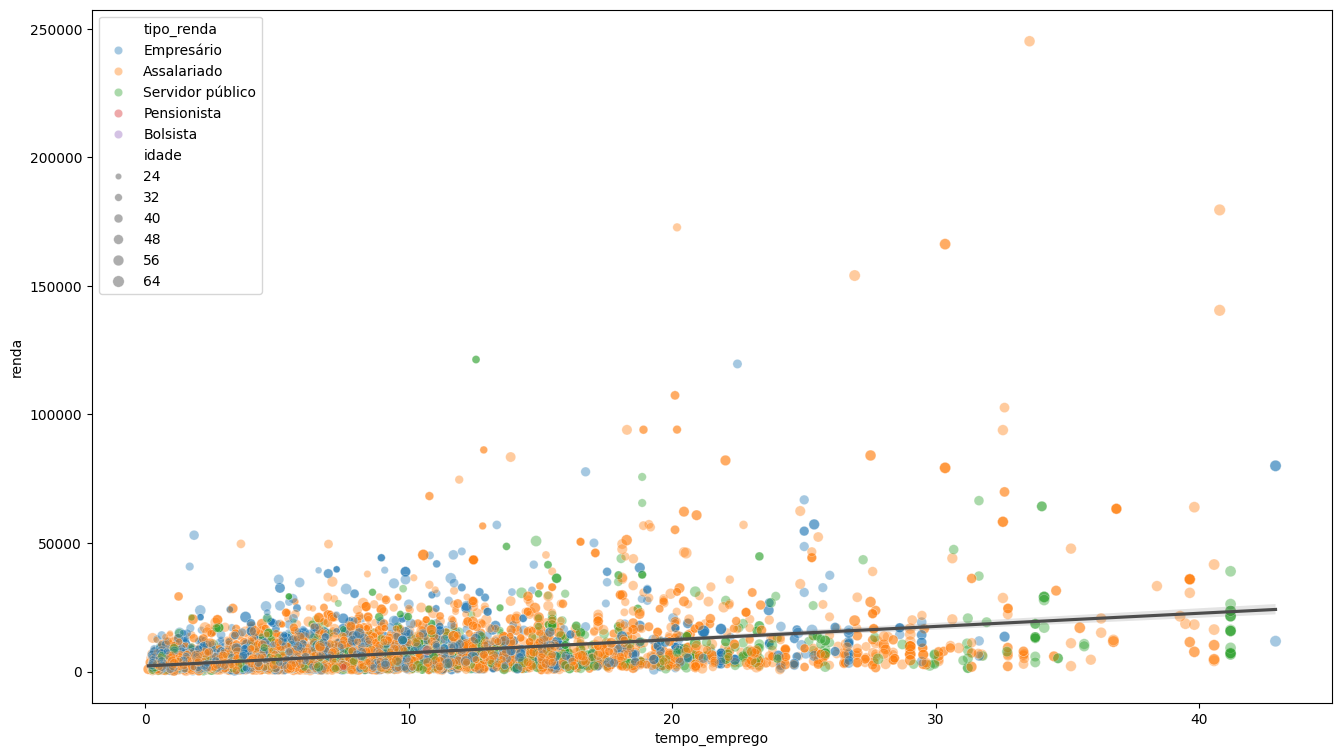

In [13]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=renda,
                alpha=0.4)

sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda, 
            scatter=False, 
            color='.3')

plt.show()

Apesar de a correlação entre as variáveis `tempo_empreg` e `renda` não ser muito elevada, a inclinação da linha de tendência permite identificar claramente uma covariância positiva entre elas.

#### Análise das variáveis qualitativas <a name="qualitativas"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### Análise de relevância preditiva com variáveis booleanas <a name="booleanas"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

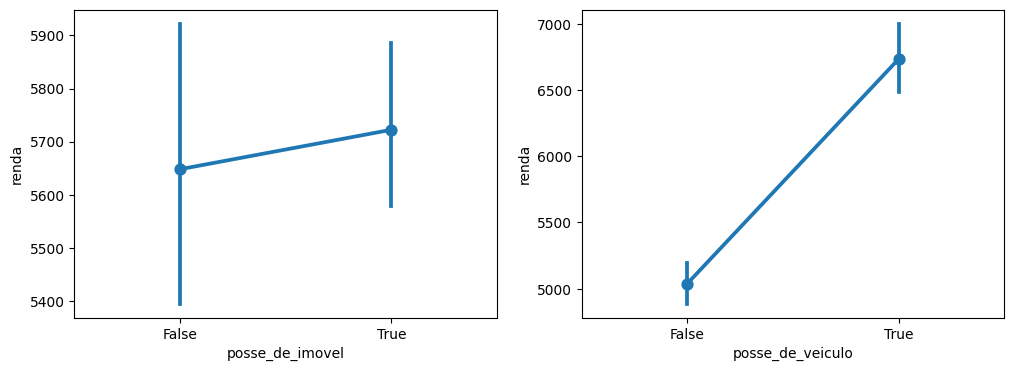

In [14]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

Ao analisar os gráficos acima, percebe-se que a variável `posse_de_veículo` tem maior relevância na predição de renda. Isso é evidenciado pela maior distância entre os intervalos de confiança para quem possui ou não um veículo. Em contraste, a variável `posse_de_imóvel` não mostra diferença significativa entre as diferentes condições de posse imobiliária.

#### Análise das variáveis qualitativas ao longo do tempo <a name="tempo"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

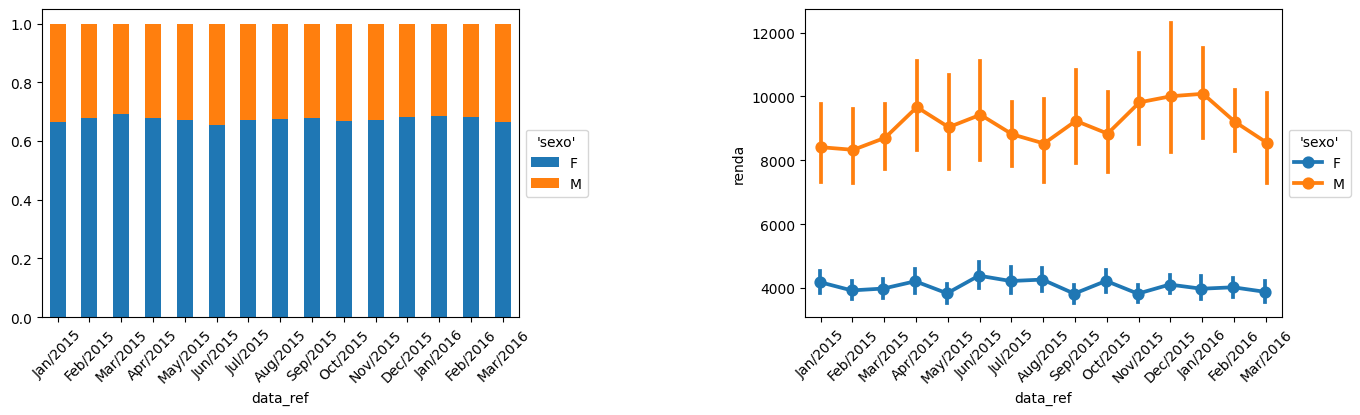

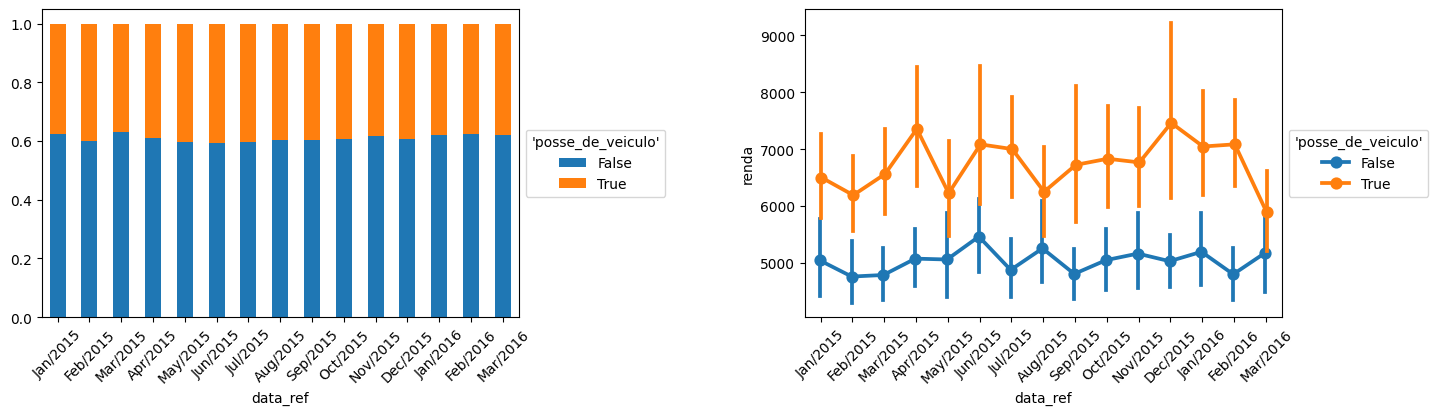

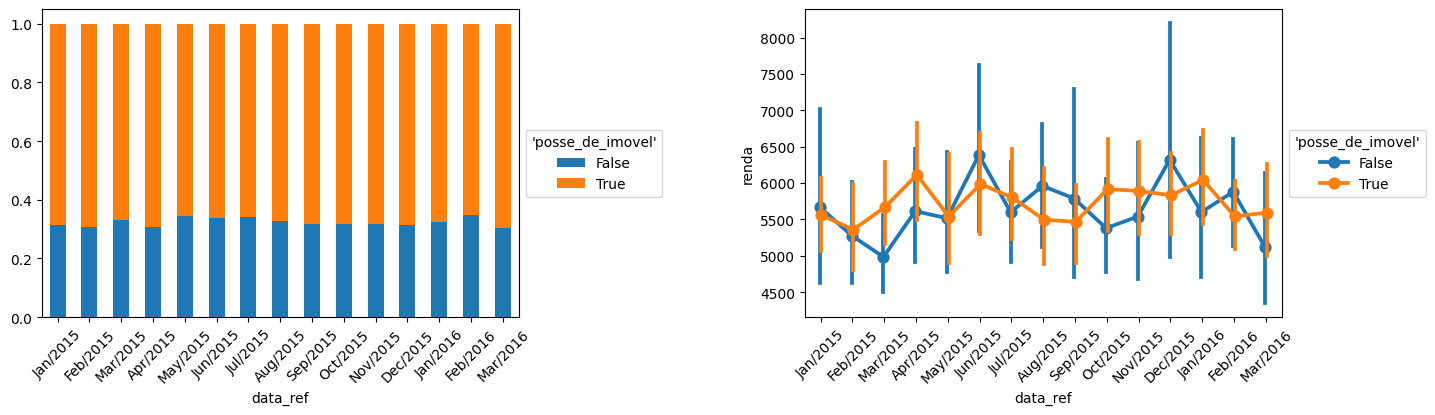

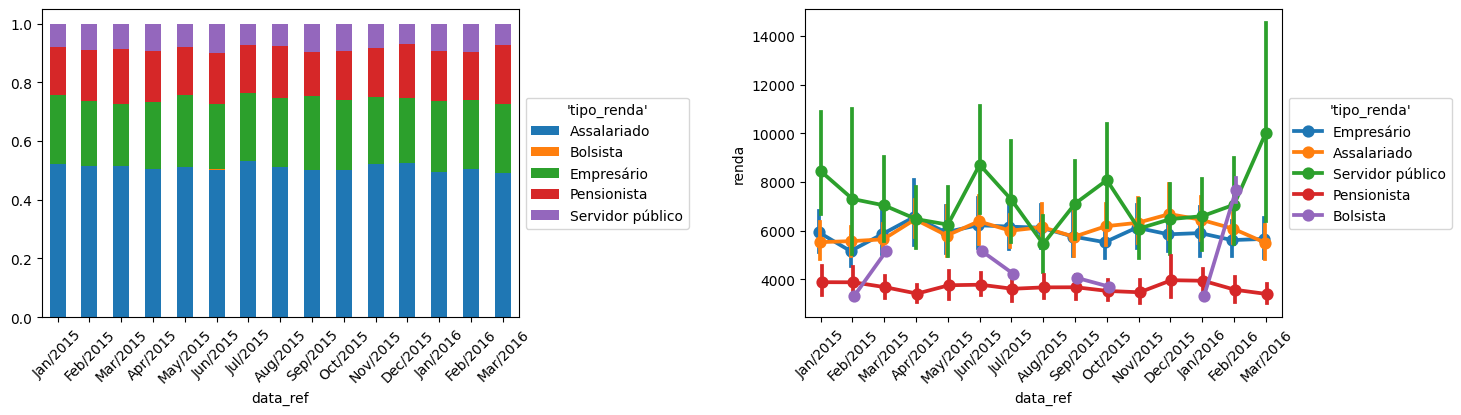

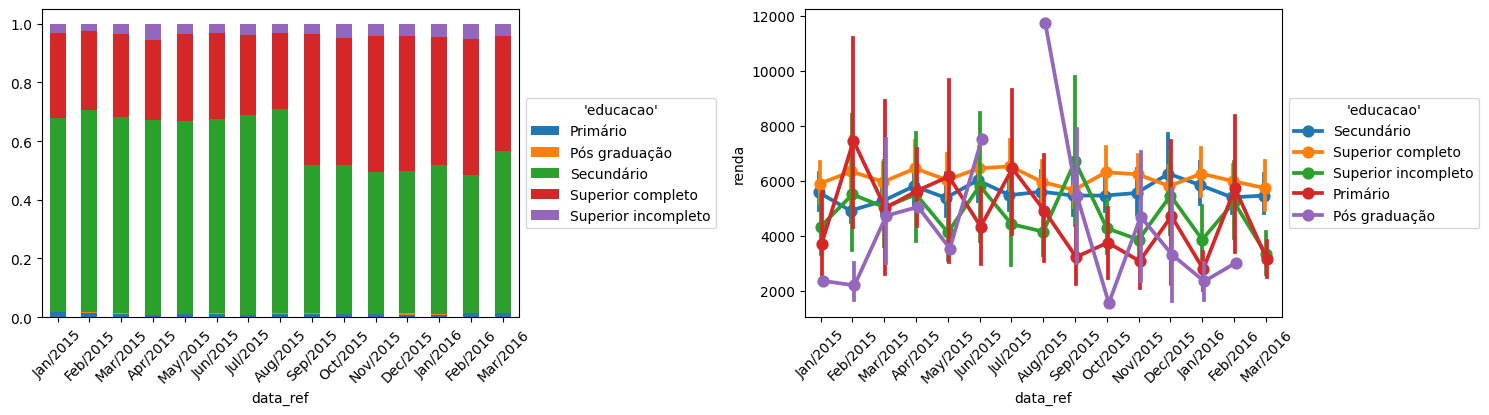

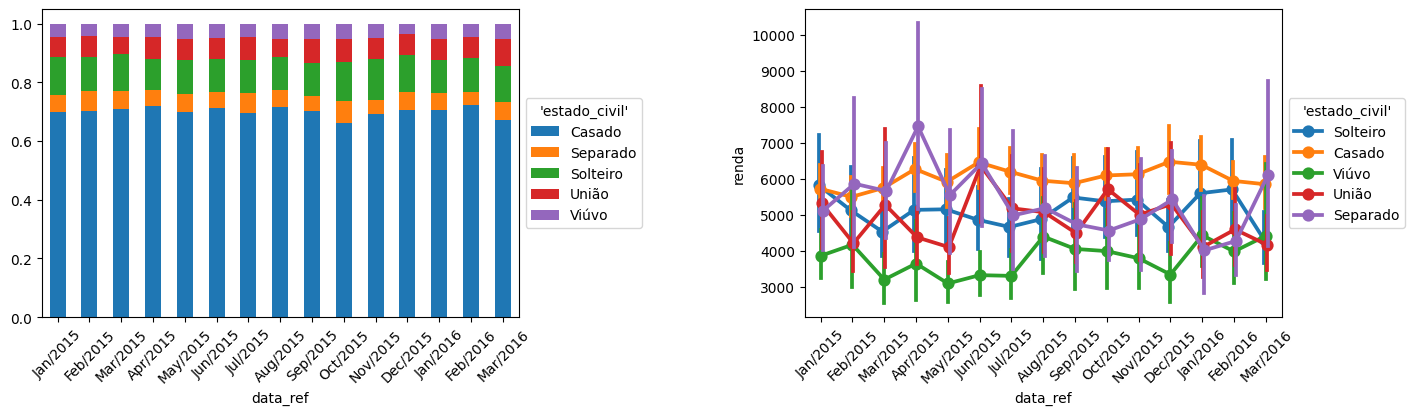

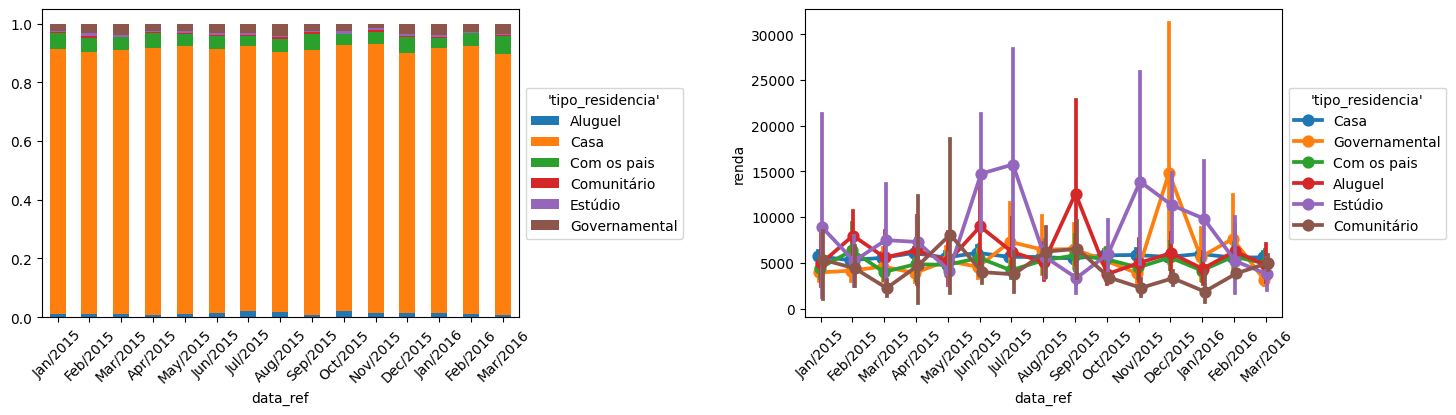

In [16]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16, 4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    tick_indices = range(len(tick_labels))
    
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax0.set_xticks(tick_indices)
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, errorbar=('ci', 95), ax=axes[1])
    ax1.set_xticks(tick_indices)
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

#### Etapa 3 do CRISP-DM: Preparação dos Dados<a name="3"></a>

Nesta etapa, realizamos as seguintes operações para preparar os dados:

**Seleção**: Os dados já foram selecionados de forma adequada?

**Limpeza**: É necessário identificar e tratar dados ausentes.

**Construção**: Desenvolvimento de novas variáveis para enriquecer o conjunto de dados.

**Integração**: Como temos apenas uma fonte de dados, essa etapa não se aplica.

**Formatação**: Os dados estão no formato apropriado para análise?

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [17]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

,tipos_dados,qtd_valores,qtd_categorias
sexo,object,12090,2
posse_de_veiculo,bool,12090,2
posse_de_imovel,bool,12090,2
qtd_filhos,int64,12090,8
tipo_renda,object,12090,5
educacao,object,12090,5
estado_civil,object,12090,5
tipo_residencia,object,12090,6
idade,int64,12090,46
tempo_emprego,float64,12090,2589


### Conversão das variáveis categóricas em variáveis numéricas (dummies) <a name="dummies"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [18]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  bool   
 8   sexo_M                         12090 non-null  bool   
 9   tipo_renda_Assalariado         12090 non-null  bool   
 10  tipo_renda_Bolsista            12090 non-null  bool   
 11  tipo_renda_Empresário          12090 non-null  bool   
 12  tipo_renda_Pensionista         12090 non-null  bool

In [19]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

,var,corr
0,renda,1.000000
1,tempo_emprego,0.385014
2,sexo_M,0.265174
3,idade,0.127516
4,posse_de_veiculo,0.082040
5,estado_civil_Casado,0.054290
6,tipo_renda_Servidor público,0.042177
7,tipo_residencia_Estúdio,0.026417
8,qt_pessoas_residencia,0.019571
9,educacao_Superior completo,0.017425


## Etapa 4 Crisp-DM: Modelagem <a name="4"></a>

Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

A técnica selecionada foi o **DecisionTreeRegressor**, devido à sua habilidade em lidar com problemas de regressão, como a previsão de renda dos clientes. Além disso, árvores de decisão são intuitivas, fáceis de interpretar e auxiliam na identificação dos atributos mais importantes para a previsão da variável-alvo, tornando-a uma opção adequada para este projeto.

### Divisão da base em treino e teste <a name="train_test"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [20]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12090, 29)
Quantidade de linhas de y: 12090
X_train: (9067, 29)
X_test: (3023, 29)
y_train: (9067,)
y_test: (3023,)


### Seleção de hiperparâmetros do modelo com for loop <a name="for_loop"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [23]:
score = pd.DataFrame({'max_depth': pd.Series(dtype='int'), 
                      'min_samples_leaf': pd.Series(dtype='int'), 
                      'score': pd.Series(dtype='float')})

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)

score.sort_values(by='score', ascending=False, inplace=True)
score

,max_depth,min_samples_leaf,score
213,8,4,0.417122
543,19,4,0.401091
243,9,4,0.401005
393,14,4,0.400246
245,9,6,0.399395
...,...,...,...
27,1,28,0.056241
28,1,29,0.056241
29,1,30,0.056241
1,1,2,0.056241


### Rodando o modelo <a name="rodando"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [24]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

#### Visualização gráfica da árvore com plot_tree <a name="plot_tree"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

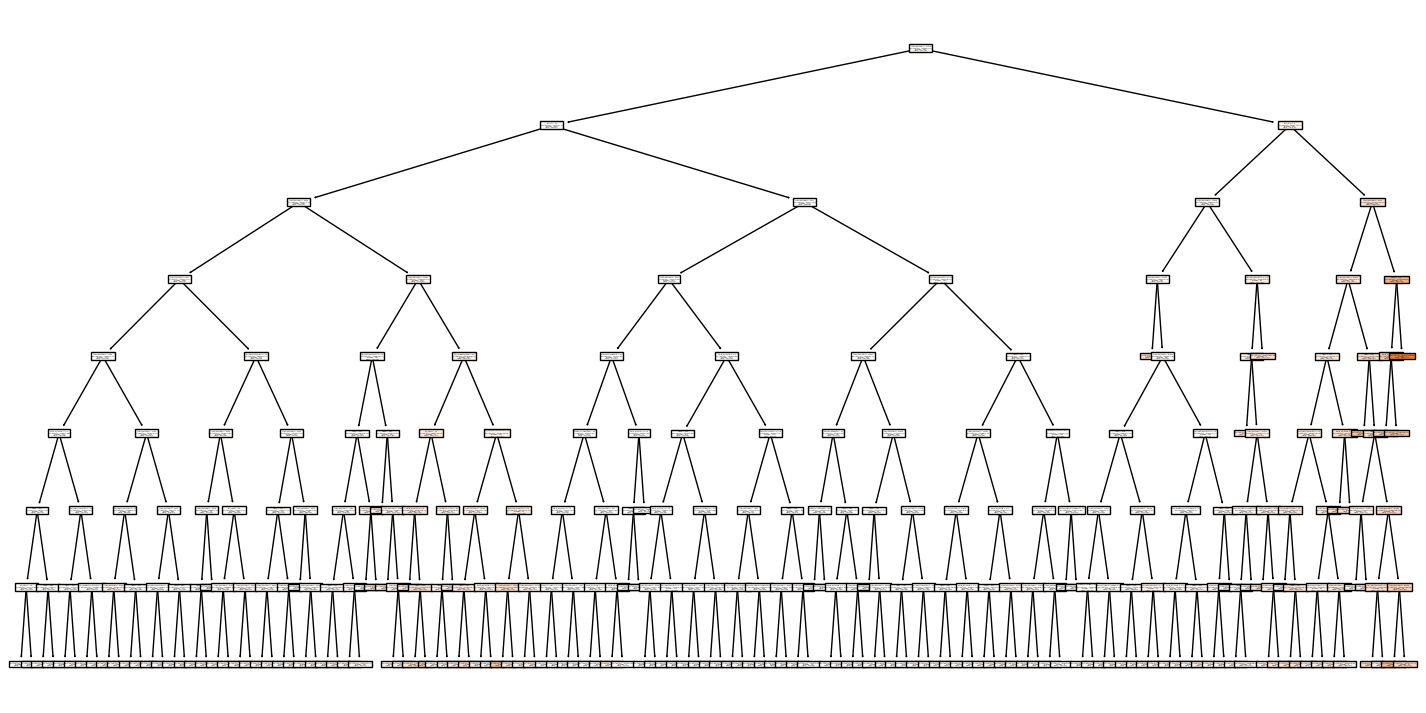

In [25]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns, 
                    filled=True)

#### Visualização impressa da árvore <a name="tree_print"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [26]:
text_tree_print = tree.export_text(decision_tree=reg_tree)

print(text_tree_print)

|--- feature_4 <= 17.08
|   |--- feature_6 <= 0.50
|   |   |--- feature_4 <= 6.93
|   |   |   |--- feature_4 <= 4.54
|   |   |   |   |--- feature_4 <= 1.69
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 52.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- value: [3237.54]
|   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |--- value: [1415.27]
|   |   |   |   |   |   |--- feature_3 >  52.50
|   |   |   |   |   |   |   |--- feature_3 <= 56.00
|   |   |   |   |   |   |   |   |--- value: [6817.46]
|   |   |   |   |   |   |   |--- feature_3 >  56.00
|   |   |   |   |   |   |   |   |--- value: [4458.54]
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |   |   |--- value: [4821.44]
|   |   |   |   |   |   |   |--- feature_3 >  54.50
|   |   |   |   |   |   |   |   |--

## Etapa 5 Crisp-DM: Avaliação dos resultados <a name="5"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [27]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,60
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,42 



In [28]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

,renda,renda_predict
0,8060.34,3127.79
1,1852.15,7146.41
2,2253.89,2465.37
3,6600.77,3654.23
4,6475.97,5465.31
...,...,...
14587,1592.57,13209.09
14588,7990.58,6350.97
14590,604.82,4341.42
14591,3352.27,5465.31


## Etapa 6 Crisp-DM: Implantação <a name="6"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Nesta etapa, o modelo desenvolvido é colocado em operação, geralmente sendo implementado em um sistema que realiza decisões de forma automatizada.

### Simulando a previsão de renda

In [30]:
# Criar uma entrada com os valores fornecidos
nova_entrada = {
    'sexo': 'M',
    'posse_de_veiculo': False,
    'posse_de_imovel': True,
    'qtd_filhos': 1,
    'tipo_renda': 'Assalariado',
    'educacao': 'Superior completo',
    'estado_civil': 'Solteiro',
    'tipo_residencia': 'Casa',
    'idade': 34,
    'tempo_emprego': None,
    'qt_pessoas_residencia': 1
}

# Transformar em DataFrame
entrada = pd.DataFrame([nova_entrada])

# Alinhar colunas com o conjunto de dados original
entrada_dummies = pd.get_dummies(entrada)
entrada_dummies = entrada_dummies.reindex(columns=X.columns, fill_value=0)

# Previsão
predicao = reg_tree.predict(entrada_dummies)
renda_estimada = np.round(predicao.item(), 2)

# Exibir o resultado
print(f"Renda estimada: R${str(renda_estimada).replace('.', ',')}")


Renda estimada: R$3671,41


---